In [11]:
import numpy as np
import matplotlib.pyplot as plt

## Task 2: Stopping to pay Premium

In [12]:
def Qx(gender,x,t,param =[]):
# This is our default mortality
    if gender == 0:
        a =[2.34544649e+01,8.70547812e-02,7.50884047e-05,-1.67917935e-02]
    else:
        a =[2.66163571e+01,8.60317509e-02,2.56738012e-04,-1.91632675e-02]
    return(np.exp(a[0]+(a[1]+a[2]*x)*x+a[3]*t))

In [13]:
x = 80
i = 0.02
v = 1/(1+i)
N=10

In [14]:
def Diff_Comm(x, n, v, specification, k=0, l0=1e5):
    """
    This function computes the differences in G_{x+k} - G_{x+n} for G in {M,N}. Moreover
    for G in {C,D} it computes G_{x+n}.
    Inputs:
    x : int : age at inception
    n : int : term of the insurance
    v : float : discount factor
    specification : str : 'M', 'N', 'C', 'D' for the
        respective commutation function
    k : int : deferment period (default 0)
    l0 : int : initial number of lives (default 100,000)
    Returns:
    result : float : value of the commutation function difference   

    """
    lx = np.zeros(n+1)
    dx = np.zeros(n+1)

    # for t in range(0,n+1):
    #     qx = Qx(gender=0, x=x+t, t=2020)
    #     if t==0:
    #         lx[t] = l0
    #         dx[t] = lx[t] * qx
    #     else:
    #         lx[t] = lx[t-1] - dx[t-1]
    #         # lx[t] = lx[t-1] * (1 - qx)
    #         dx[t] = lx[t] * qx
    lx[0] = l0        
    for t in range(0,n):
        qx = Qx(0,x+t,2020)
        lx[t+1] = lx[t]*(1 - qx)
        dx[t] = lx[t] * qx
    result = 0.0
    
    if specification =='M':
        for t in range(k,n):
            result += v **(x+t+1) * dx[t]
    elif specification =='N':
        for t in range(k,n):
            result += v**(x+t) * lx[t]
    elif specification =='C':
        result += v**(x+n+1) * dx[-1]
    elif specification =='D':
        result += v**(x+n) * lx[-1]
    else:   
        raise ValueError("Specification must be valid letter")
    return(result)

#### Subtask 2.1

In [15]:
P = 1e5 * (Diff_Comm(x=80, n=N, v=v, specification='M') + Diff_Comm(x=80, n=N, v=v, specification='D')) / Diff_Comm(x=80, n=N, v=v, specification='N')
print("The annual premium at inception is for age 80: ", P)

The annual premium at inception is for age 80:  12302.976099214855


#### Subtask 2.2

In [16]:
def k_V_x(x, n, k, v, premium, C):
    """
    This function computes the k-year temporary insurance value at age x
    Inputs:
    x : int : age at inception
    n : int : term of the insurance
    k : int : deferment period
    v : float : discount factor
    specification : str : 'M', 'N', 'C', 'D' for the
        respective commutation function
    C : float : sum insured
    Returns:
    result : float : value of the k-year temporary insurance at age x   

    """
    term1 = C*(Diff_Comm(x, n, v, specification='M', k=k) + Diff_Comm(x, n, v, specification='D', k=0))
    term2 = premium * Diff_Comm(x, n, v, specification='N', k=k)
    result = (term1 - term2) / Diff_Comm(x, k, v, specification='D', k=0)
    return result


def k_TildeL_x(x, n, k, v, premium, C):
    fac1 = k_V_x(x, n, k, v, premium, C)
    fac2 = Diff_Comm(x,k,v,specification='D', k=0) / (Diff_Comm(x,n,v,specification='M', k=k) + Diff_Comm(x,n,v,specification='D',k=0))
    return fac1 * fac2

In [17]:
# print(k_V_x(x=80, n=10, k=1, v=v, premium=P, C=1e5))
print('The benefit L~ after one premium stop is: ', k_TildeL_x(x=80, n=10, k=1, v=v, premium=P, C=1e5))

The benefit L~ after one premium stop is:  9228.773500783695


#### Subtask 2.3

In [18]:
for k in range(1, N+1):
    print('Benefit level L~ at stopping time k=', k, 'is ', k_TildeL_x(x=80, n=10, k=k, v=v, premium=P, C=1e5), 'and mathematical reserve is : ', k_V_x(x=80, n=10, k=k, v=v, premium=P, C=1e5))
    # print( k_TildeL_x(x=80, n=10, k=k, v=v, premium=P, C=1e5))

Benefit level L~ at stopping time k= 1 is  9228.773500783695 and mathematical reserve is :  8062.412800927408
Benefit level L~ at stopping time k= 2 is  18375.481850308755 and mathematical reserve is :  16260.208989727094
Benefit level L~ at stopping time k= 3 is  27498.514655300485 and mathematical reserve is :  24650.205699585593
Benefit level L~ at stopping time k= 4 is  36670.14539071584 and mathematical reserve is :  33308.27985147717
Benefit level L~ at stopping time k= 5 is  45980.82561053005 and mathematical reserve is :  42335.9949433317
Benefit level L~ at stopping time k= 6 is  55545.00479050228 and mathematical reserve is :  51870.0114594586
Benefit level L~ at stopping time k= 7 is  65509.06015080593 and mathematical reserve is :  62095.66956296867
Benefit level L~ at stopping time k= 8 is  76062.13670635992 and mathematical reserve is :  73266.93563725812
Benefit level L~ at stopping time k= 9 is  87450.96437880085 and mathematical reserve is :  85736.23958705967
Benefit 

#### Subtask 2.4

In [19]:
def A_x_n(x, n, k, v, C):
    result = C * (Diff_Comm(x, n, v, 'M', k=0, l0=1e5) + Diff_Comm(x,n,v,'D') ) / Diff_Comm(x,k,v,'D')
    return result

#### Subtask 2.4


We compute the benefits through the following way:
$$ \mathbb{E}(\text{benefits}) = v\cdot q_x \cdot L + v\cdot p_x \cdot \tilde{L}(t=1) \cdot A_{x+1:\overline{9|}} $$


In [20]:
benefits = v * (Qx(0,80,2020) * 1e5 + (1-Qx(0,80,2020)) * k_TildeL_x(x=80, n=10, k=1, v=v, premium=P, C=1e5) * A_x_n(81,9,0,v,1))
print('The resulting benefits accumulate to: ', benefits, ' which coinsicde with the premium computed in substask 2.1  \n P= ', P)

The resulting benefits accumulate to:  12302.976099214835  which coinsicde with the premium computed in substask 2.1  
 P=  12302.976099214855


#### Subtask 2.5

We compute the beneftis through the following way: 
$$

In [23]:
premiums = k_V_x(x=80, n=10, k=1, v=v, premium=P, C=1e5) + P
print('E(premium) = ', premiums)
q_x1 = Qx(gender=0, x=81, t=2020)
benefits = v * q_x1 * 1e5 + v * (1-q_x1) * k_TildeL_x(x=80, n=10, k=2, v=v, premium=P, C=1e5) * A_x_n(82,8,0,v,1)
print('E(benefits) = ', benefits)
# premium2 = 
# benefits2 = Qx(gender=0, x=80, t=2020) * v * 1e5 + 

E(premium) =  20365.388900142265
E(benefits) =  20365.388900142287


## Task 3 Disability Insurance on two lives

In [25]:
from Markov_final import Diab2Lifes, Qx, Ix, Rx
import numpy as np
import matplotlib.pyplot as plt

In [27]:
Symbols =[]
Symbols.append(["S","S"])
Symbols.append(["S","D"])
Symbols.append(["D","S"])
Symbols.append(["D","D"])
Symbols.append(["S",3])
Symbols.append([3,"S"])
Symbols.append([3,3])
Symbols.append(["T",3])
Symbols.append([3,"T"])
Symbols.append(["T","D"])
Symbols.append(["D","T"])

SybTransitions = []
SybTransitions.append(["S","S","T","S"])
SybTransitions.append(["T","S","T","T"])
SybTransitions.append(["S","S","S","D"])
SybTransitions.append(["S","D","D",1])
SybTransitions.append(["D",1,"S","S"])
SybTransitions.append(["S","S","S","S"])
SybTransitions.append(["S","S","S","D"])
SybTransitions.append(["S","S","S","T"])
SybTransitions.append(["S","S","D","S"])
SybTransitions.append(["S","S","D","D"])
SybTransitions.append(["S","S","D","T"])
SybTransitions.append(["S","S","T","S"])
SybTransitions.append(["S","S","T","D"])
SybTransitions.append(["S","S","T","T"])
SybTransitions.append(["S","D","S","S"])
SybTransitions.append(["S","D","S",1])
SybTransitions.append(["S","D","S","T"])
SybTransitions.append(["S","D","D","S"])
SybTransitions.append(["S","D","D",1])
SybTransitions.append(["S","D","D","T"])
SybTransitions.append(["S","D","T","S"])
SybTransitions.append(["S","D","T",1])
SybTransitions.append(["S","D","T","T"])

SybTransitions = []
SybTransitions.append(["S","S","T","S"])
SybTransitions.append(["T","S","T","T"])
SybTransitions.append(["S","S","S","D"])
SybTransitions.append(["S","D","D",1])
SybTransitions.append(["D",1,"S","S"])
SybTransitions.append(["S","S","S","S"])

def DoShowPij(psymDis, SybTransitions, x=40):
    print("Markov Transitions")
    for i in SybTransitions:
        print("%3d: (%s,%s) to (%s,%s)"%(x,str(i[0]),str(i[1]),str(i[2]),str(i[3])))
        psymDis.vGetPij(x,i[0],i[1],i[2],i[3])

#### Subtask 3.3

To ensure/guarantee functionality install the python package: https://libraries.io/pypi/markovlv/2.6.0 and set $\texttt{bCPP=True}$

Error from Koller Code: for independence do the following:

` a = Diab2Lifes(PaymentEnd=90,) `

`a.vSetLevelsMort(dMortSS = 1., dMortSD =1., dMortDD=1., dMortST=1., dMortDT=1.)`

`a.vSetLevelsDis(dDisSS=1., dDisSD=1., dDisST=1.)`

`a.vSetLevelsReact(dReactSD=1., dReactDD=1., dReactDT=1.) `

#### Subtask 3.4

In [79]:
reserves_excact = np.zeros((len(Symbols)))

CPP: success
(S,S) -->  0 --> Vx= 121417.12
(S,D) -->  1 --> Vx= 256742.49
(D,S) -->  6 --> Vx= 332972.75
(D,D) -->  7 --> Vx= 447241.27
(S,3) -->  4 --> Vx= 314586.04
(3,S) --> 24 --> Vx= 453394.98
(3,3) --> 28 --> Vx= 600216.87
(T,3) --> 34 --> Vx= 262791.31
(3,T) --> 29 --> Vx= 399970.77
(T,D) --> 31 --> Vx= 204479.42
(D,T) --> 11 --> Vx= 276182.88


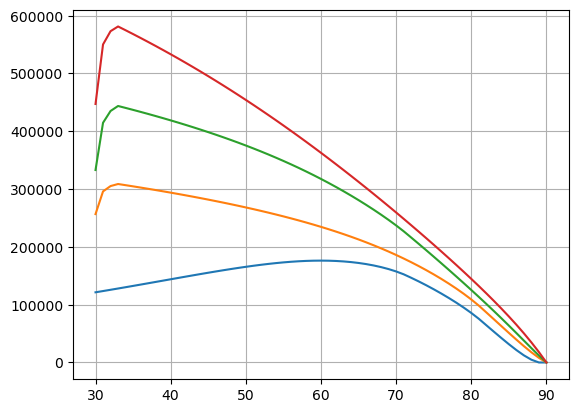

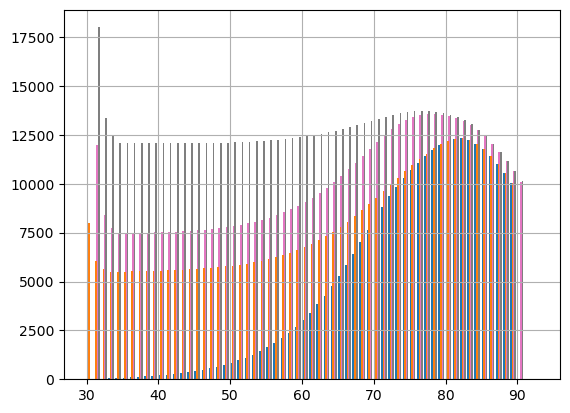

In [80]:
a = Diab2Lifes(PaymentEnd=90,)
a.vSetLevelsMort(dMortSS = 1., dMortSD =1., dMortDD=1., dMortST=1., dMortDT=1.)
a.vSetLevelsDis(dDisSS=1., dDisSD=1., dDisST=1.)
a.vSetLevelsReact(dReactSD=1., dReactDD=1., dReactDT=1.)
a.vSetQx(Qx)
a.vSetIx(Ix)
a.vSetRx(Rx)
a.vSetGender(0,1)
a.vSetAges(30,40)
a.vSetBenefits(12000,8000,18000)
a.vPopulatePij()
a.vPopulateApre()
a.vPlot()


for j,s in enumerate(Symbols):
    symb1 = s[0]
    symb2 = s[1]
    curr = a.dGetVx(30,symb1,symb2)
    reserves_excact[j] = curr
    print("(%s,%s) --> %2d --> Vx=%10.2f"%(symb1,symb2,a.Mapper2Live(symb1,symb2),a.dGetVx(30,symb1,symb2)))


Here we perform the simulations for $n=10, 100, 1000, 10'000, 100'000$ steps 

In [81]:
for j, elt in enumerate(Symbols):
    print(elt)

print('\n', len(Symbols))

['S', 'S']
['S', 'D']
['D', 'S']
['D', 'D']
['S', 3]
[3, 'S']
[3, 3]
['T', 3]
[3, 'T']
['T', 'D']
['D', 'T']

 11


In [144]:
ns = np.array([10, 100, 1000, 10000, 100000])
meanVals = np.zeros((len(Symbols), ns.shape[0]))


for i,s in enumerate(Symbols):
    symb1 = s[0]
    symb2 = s[1]
    
    a = Diab2Lifes(PaymentEnd=90,)
    a.vSetLevelsMort(dMortSS = 1., dMortSD =1., dMortDD=1., dMortST=1., dMortDT=1.)
    a.vSetLevelsDis(dDisSS=1., dDisSD=1., dDisST=1.)
    a.vSetLevelsReact(dReactSD=1., dReactDD=1., dReactDT=1.)
    a.vSetQx(Qx)
    a.vSetIx(Ix)
    a.vSetRx(Rx)
    a.vSetGender(0,1)
    a.vSetAges(30,40)
    a.vSetBenefits(12000,8000,18000)
    a.vPopulatePij()
    a.vPopulateApre()
    a.psymM.vSetStartTime(90)
    a.iStart=90
    a.iStop = 30
    a.psymM.vSetStopTime(30)
    StartState = a.Mapper2Live(symb1,symb2)
    a.vSetInitState(StartState)
    
    for j, n in enumerate(ns):
        print(StartState)
        # print(StartState, n)
        # a.vGenerateTrajectory()
        curr_value = a.psymM.dGetMeanDK(30, StartState, int(n)) # middle argument is intial state
        meanVals[i,j] = curr_value
    

CPP: success
0
0
0
0
0
CPP: success
1
1
1
1
1
CPP: success
6
6
6
6
6
CPP: success
7
7
7
7
7
CPP: success
4
4
4
4
4
CPP: success
24
24
24
24
24
CPP: success
28
28
28
28
28
CPP: success
34
34
34
34
34
CPP: success
29
29
29
29
29
CPP: success
31
31
31
31
31
CPP: success
11
11
11
11
11


In [145]:
meanVals

array([[ 99781.20064133, 112405.30851238, 119429.60421039,
        121683.02531102, 121734.001635  ],
       [227565.15839556, 244100.29563713, 258815.93913898,
        255564.28703424, 256530.15757063],
       [331109.95153118, 327165.28395105, 329842.95123035,
        330724.28939539, 332760.65479354],
       [385129.69560364, 440268.31794696, 448727.44205906,
        446851.22791344, 446268.66152985],
       [295163.95951068, 303244.3702133 , 314968.51109465,
        313809.67385704, 314630.1280358 ],
       [405671.29669654, 455188.7528789 , 453969.50430069,
        452969.23381293, 453494.88975614],
       [605771.8996278 , 593633.83856557, 603784.57806877,
        600703.99913508, 600354.41401377],
       [272746.40571956, 261631.82148223, 262155.94777425,
        262364.96363715, 262756.31442314],
       [413218.75789042, 403053.67439038, 402777.91165046,
        400416.07394505, 400084.50610823],
       [193978.42782629, 210105.79969783, 206933.48423325,
        203477.07414829

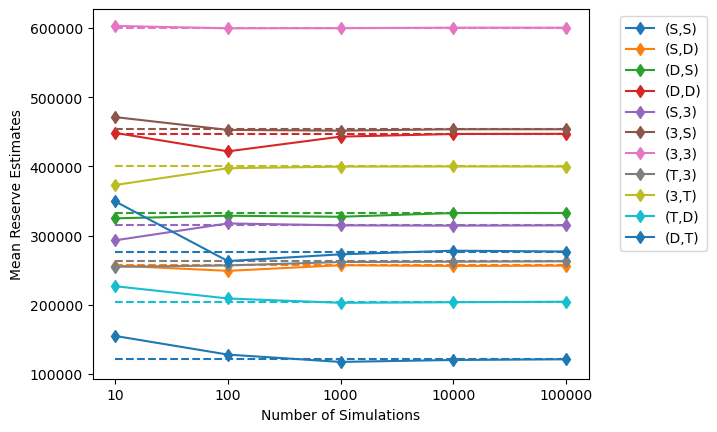

In [129]:
plt.figure()
plt.ylabel("Mean Reserve Estimates")
plt.xlabel("Number of Simulations")
for i,s in enumerate(Symbols):
    symb1 = s[0]
    symb2 = s[1]
    line, = plt.plot(meanVals[i,:], 'd-', label="(%s,%s)"%(symb1,symb2))
    plt.hlines(reserves_excact[i], xmin=0, xmax=len(ns)-1, colors=line.get_color(), linestyles='dashed')
plt.xticks(np.arange(len(ns)), ns)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Next we Plot the CDF's for the 11 inital states:

In [130]:
N=100000
simulations = np.zeros((len(Symbols), N))
for i,s in enumerate(Symbols):
    symb1 = s[0]
    symb2 = s[1]
    
    a = Diab2Lifes(PaymentEnd=90,)
    a.vSetLevelsMort(dMortSS = 1., dMortSD =1., dMortDD=1., dMortST=1., dMortDT=1.)
    a.vSetLevelsDis(dDisSS=1., dDisSD=1., dDisST=1.)
    a.vSetLevelsReact(dReactSD=1., dReactDD=1., dReactDT=1.)
    a.vSetQx(Qx)
    a.vSetIx(Ix)
    a.vSetRx(Rx)
    a.vSetGender(0,1)
    a.vSetAges(30,40)
    a.vSetBenefits(12000,8000,18000)
    a.vPopulatePij()
    a.vPopulateApre()
    a.psymM.vSetStartTime(90)
    a.iStart=90
    a.iStop = 30
    a.psymM.vSetStopTime(30)
    StartState = a.Mapper2Live(symb1,symb2)
    a.vSetInitState(StartState)
    for j in range(N):
        a.vGenerateTrajectory()
        simulations[i,j] = a.psymM.dGetRandDK(30, StartState)


CPP: success
CPP: success
CPP: success
CPP: success
CPP: success
CPP: success
CPP: success
CPP: success
CPP: success
CPP: success
CPP: success


In [131]:
simulation_means = np.mean(simulations, axis=1)
simulations_vars = np.var(simulations, axis=1)

In [132]:
simulations[0,:]

array([108233.54986551,  95502.04200209, 173412.9461423 , ...,
       104551.20441729, 107512.71141529,  26284.82315501])

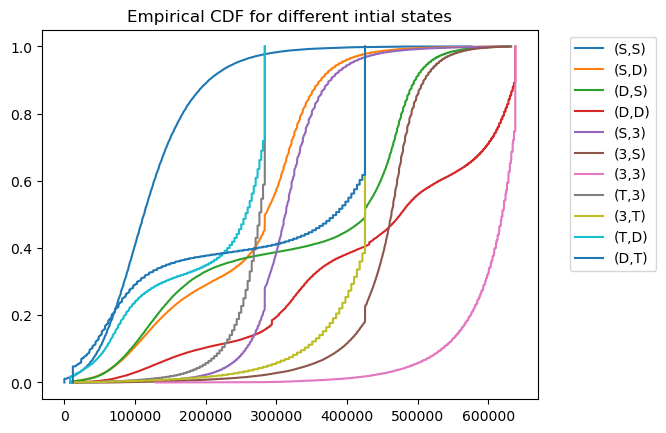

In [133]:
xs = np.arange(N)/N
ys = np.sort(simulations, axis=-1)

plt.figure()
plt.title("Empirical CDF for different intial states")
for j, elt in enumerate(Symbols):
    plt.plot(ys[j,:], xs, label="(%s,%s)"%(elt[0],elt[1]))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
  

In [134]:
quant=[0.05,0.1,0.25,0.5,0.75,0.9,0.95]
quantiles_cdf = np.zeros((len(Symbols), len(quant)))

for i,s in enumerate(Symbols):
    print("Quantiles for state (%s,%s)"%(s[0],s[1]))
    ys = np.sort(simulations[i,:])
    for j,alpha in enumerate(quant):
        index = int(N * alpha + 0.5)
        quantiles_cdf[i,j] = ys[index]
        print("%5.2f pct"%(100*alpha),"--->","%10.2f"%ys[index])

Quantiles for state (S,S)
 5.00 pct --->   32632.56
10.00 pct --->   49479.55
25.00 pct --->   77106.21
50.00 pct --->  112629.76
75.00 pct --->  154890.18
90.00 pct --->  204790.53
95.00 pct --->  241507.78
Quantiles for state (S,D)
 5.00 pct --->   72123.71
10.00 pct --->   96886.65
25.00 pct --->  168968.29
50.00 pct --->  284038.82
75.00 pct --->  327222.43
90.00 pct --->  363535.47
95.00 pct --->  389758.69
Quantiles for state (D,S)
 5.00 pct --->   71082.68
10.00 pct --->   94148.23
25.00 pct --->  150723.61
50.00 pct --->  425473.25
75.00 pct --->  470794.35
90.00 pct --->  496202.16
95.00 pct --->  515069.14
Quantiles for state (D,D)
 5.00 pct --->  124652.10
10.00 pct --->  192768.66
25.00 pct --->  323973.82
50.00 pct --->  475569.90
75.00 pct --->  611527.32
90.00 pct --->  638209.88
95.00 pct --->  638209.88
Quantiles for state (S,3)
 5.00 pct --->  231927.57
10.00 pct --->  256416.62
25.00 pct --->  283648.84
50.00 pct --->  312814.04
75.00 pct --->  341594.26
90.00 pct --

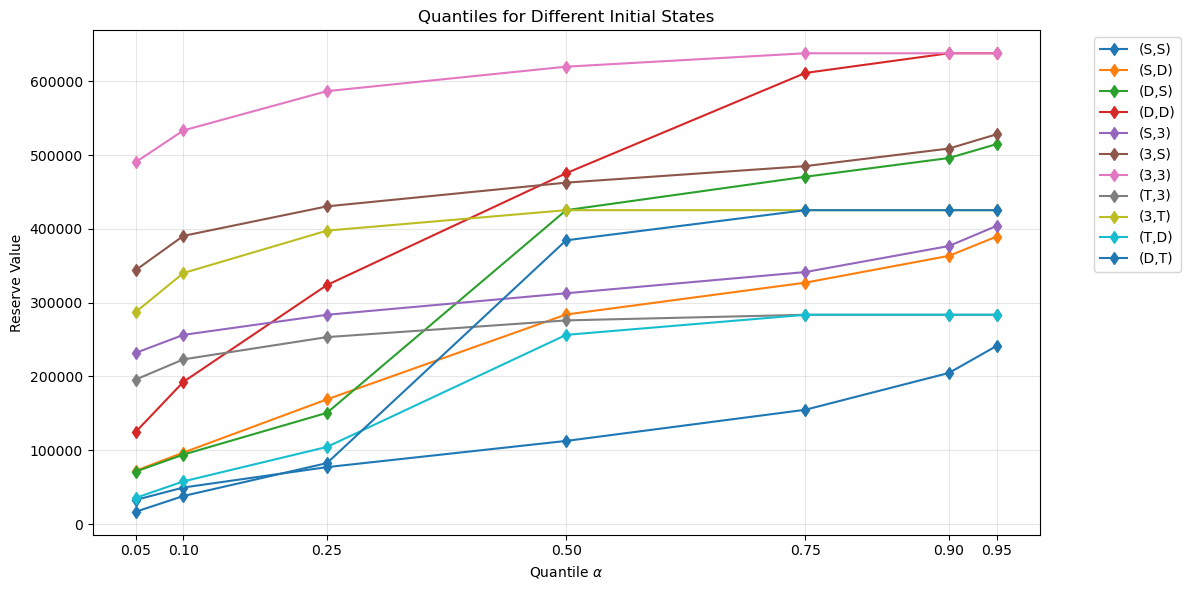

In [135]:
plt.figure(figsize=(12, 6))
plt.title("Quantiles for Different Initial States")
plt.xlabel(r'Quantile $\alpha$')
plt.ylabel("Reserve Value")
plt.xticks()

for i, s in enumerate(Symbols):

    plt.plot(quant, quantiles_cdf[i, :], 'd-', label="(%s,%s)" % (s[0], s[1]))

plt.xticks(quant)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### Subtask 3.5

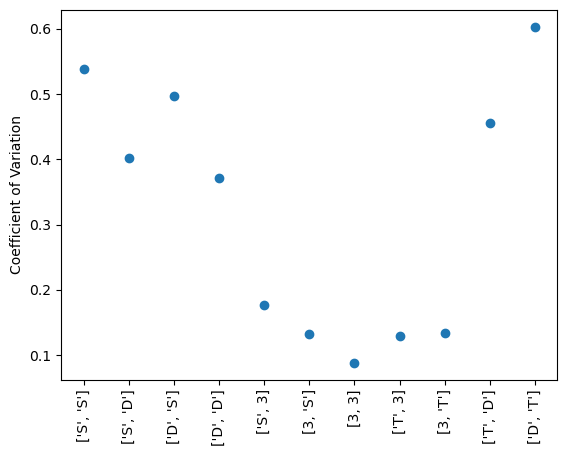

In [157]:
plt.figure()
plt.ylabel("Coefficient of Variation")
plt.xticks(ticks=np.arange(11), labels = Symbols, rotation=90)
plt.plot(np.arange(11), np.sqrt(simulations_vars)/simulation_means, 'o')

In [137]:
simulation_means

array([121562.95917772, 256821.71581667, 332989.68367492, 448380.45352609,
       314434.02029737, 453101.23748724, 600238.23066845, 262646.00823445,
       400144.62764706, 204613.13307978, 276716.05976447])

#### Subtask 3.6

Now the random variables for the two lives are not independent anymore. Thus we adapt the Levels for Mort, Dis and React:

In [158]:
N=100000
simulations_dependent = np.zeros((len(Symbols), N))
for i,s in enumerate(Symbols):
    symb1 = s[0]
    symb2 = s[1]
    
    a = Diab2Lifes(PaymentEnd=90,)
    a.vSetLevelsMort(dMortSS = 0.9, dMortSD =1.1, dMortDD=1.2, dMortST=1.1, dMortDT=1.2)
    a.vSetLevelsDis(dDisSS=0.85, dDisSD=1.15, dDisST=1.)
    a.vSetLevelsReact(dReactSD=1.1, dReactDD=0.9, dReactDT=0.6)
    a.vSetQx(Qx)
    a.vSetIx(Ix)
    a.vSetRx(Rx)
    a.vSetGender(0,1)
    a.vSetAges(30,40)
    a.vSetBenefits(12000,8000,18000)
    a.vPopulatePij()
    a.vPopulateApre()
    a.psymM.vSetStartTime(90)
    a.iStart=90
    a.iStop = 30
    a.psymM.vSetStopTime(30)
    StartState = a.Mapper2Live(symb1,symb2)
    a.vSetInitState(StartState)
    for j in range(N):
        a.vGenerateTrajectory()
        simulations_dependent[i,j] = a.psymM.dGetRandDK(30, StartState)

CPP: success
CPP: success
CPP: success
CPP: success
CPP: success
CPP: success
CPP: success
CPP: success
CPP: success
CPP: success
CPP: success


In [160]:
simulation_dependent_means = np.mean(simulations_dependent, axis=1)
simulations_dependent_vars = np.var(simulations_dependent, axis=1)
for j,s in enumerate(Symbols):
    symb1 = s[0]
    symb2 = s[1]
    print("(%s,%s) --> %2d --> Vx=%10.2f"%(symb1,symb2,a.Mapper2Live(symb1,symb2),simulation_dependent_means[j]))


(S,S) -->  0 --> Vx= 114931.57
(S,D) -->  1 --> Vx= 248519.44
(D,S) -->  6 --> Vx= 318383.69
(D,D) -->  7 --> Vx= 455321.09
(S,3) -->  4 --> Vx= 314678.12
(3,S) --> 24 --> Vx= 451064.63
(3,3) --> 28 --> Vx= 593818.48
(T,3) --> 34 --> Vx= 259233.60
(3,T) --> 29 --> Vx= 395348.92
(T,D) --> 31 --> Vx= 223778.79
(D,T) --> 11 --> Vx= 319036.97


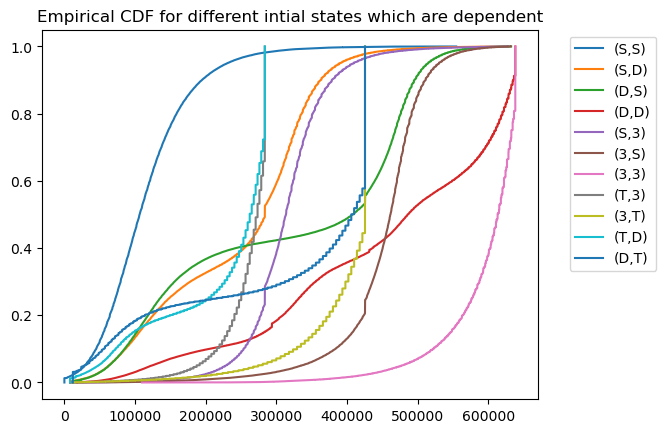

In [161]:
xs = np.arange(N)/N
ys_dep = np.sort(simulations_dependent, axis=-1)

plt.figure()
plt.title("Empirical CDF for different intial states which are dependent")
for j, elt in enumerate(Symbols):
    plt.plot(ys_dep[j,:], xs, label="(%s,%s)"%(elt[0],elt[1]))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [162]:
quant=[0.05,0.1,0.25,0.5,0.75,0.9,0.95]
quantiles_cdf_dep = np.zeros((len(Symbols), len(quant)))

for i,s in enumerate(Symbols):
    print("Quantiles for state (%s,%s)"%(s[0],s[1]))
    for j,alpha in enumerate(quant):
        index = int(N * alpha + 0.5)
        quantiles_cdf_dep[i,j] = ys_dep[i,index]
        print("%5.2f pct"%(100*alpha),"--->","%10.2f"%ys_dep[i,index])

Quantiles for state (S,S)
 5.00 pct --->   28686.19
10.00 pct --->   44970.53
25.00 pct --->   72168.44
50.00 pct --->  106464.45
75.00 pct --->  146983.86
90.00 pct --->  194662.50
95.00 pct --->  230375.78
Quantiles for state (S,D)
 5.00 pct --->   62765.49
10.00 pct --->   86458.86
25.00 pct --->  147808.17
50.00 pct --->  283648.84
75.00 pct --->  325643.92
90.00 pct --->  362806.88
95.00 pct --->  389758.69
Quantiles for state (D,S)
 5.00 pct --->   62765.90
10.00 pct --->   85172.86
25.00 pct --->  135226.43
50.00 pct --->  408123.86
75.00 pct --->  468077.00
90.00 pct --->  495375.37
95.00 pct --->  515027.56
Quantiles for state (D,D)
 5.00 pct --->  122996.51
10.00 pct --->  205020.19
25.00 pct --->  331478.68
50.00 pct --->  485852.90
75.00 pct --->  610074.55
90.00 pct --->  635101.10
95.00 pct --->  638209.88
Quantiles for state (S,3)
 5.00 pct --->  228046.56
10.00 pct --->  253384.96
25.00 pct --->  283648.84
50.00 pct --->  313577.73
75.00 pct --->  342672.65
90.00 pct --

#### Subtask 3.7

#### Subtask 3.8

In [169]:
a = Diab2Lifes(PaymentEnd=90,)
a.vSetLevelsMort(dMortSS = 1., dMortSD =1., dMortDD=1., dMortST=1., dMortDT=1.)
a.vSetLevelsDis(dDisSS=1., dDisSD=1., dDisST=1.)
a.vSetLevelsReact(dReactSD=1., dReactDD=1., dReactDT=1.)
a.vSetQx(Qx)
a.vSetIx(Ix)
a.vSetRx(Rx)
a.vSetGender(0,1)
a.vSetAges(30,40)
a.vSetBenefits(12000,8000,18000)
a.vPopulatePij()
a.vPopulateApre()
# a.vPlot()

# New Symbols List:
Symbols8 = [["S","S"], ["S","S"], ["S","S"], ["S","S"], ["S","S"], ["D", "S"], [3,3], ["D", "T"]]
reserves_8 = np.zeros((len(Symbols8)))


for j,s in enumerate(Symbols8):
    symb1 = s[0]
    symb2 = s[1]
    curr = a.dGetVx(30,symb1,symb2)
    reserves_8[j] = curr
    print("(%s,%s) --> %2d --> Vx=%10.2f"%(symb1,symb2,a.Mapper2Live(symb1,symb2),a.dGetVx(30,symb1,symb2)))

Exp_Loss = np.sum(reserves_8)
print("Expected Loss for the given portfolio is: ", Exp_Loss)

CPP: success
(S,S) -->  0 --> Vx= 121417.12
(S,S) -->  0 --> Vx= 121417.12
(S,S) -->  0 --> Vx= 121417.12
(S,S) -->  0 --> Vx= 121417.12
(S,S) -->  0 --> Vx= 121417.12
(D,S) -->  6 --> Vx= 332972.75
(3,3) --> 28 --> Vx= 600216.87
(D,T) --> 11 --> Vx= 276182.88
Expected Loss for the given portfolio is:  1816458.1036698192


Now we need to perform 8'000'000 simulation, a million for each initial state:

In [200]:
N_large=1000000
simulations_large = np.zeros((len(Symbols8), N_large))

for i,s in enumerate(Symbols8):
    symb1 = s[0]
    symb2 = s[1]
    
    a = Diab2Lifes(PaymentEnd=90,)
    a.vSetLevelsMort(dMortSS = 1., dMortSD =1., dMortDD=1., dMortST=1., dMortDT=1.)
    a.vSetLevelsDis(dDisSS=1., dDisSD=1., dDisST=1.)
    a.vSetLevelsReact(dReactSD=1., dReactDD=1., dReactDT=1.)
    a.vSetQx(Qx)
    a.vSetIx(Ix)
    a.vSetRx(Rx)
    a.vSetGender(0,1)
    a.vSetAges(30,40)
    a.vSetBenefits(12000,8000,18000)
    a.vPopulatePij()
    a.vPopulateApre()
    a.psymM.vSetStartTime(90)
    a.iStart=90
    a.iStop = 30
    a.psymM.vSetStopTime(30)
    StartState = a.Mapper2Live(symb1,symb2)
    a.vSetInitState(StartState)
    print("Starting simulations for state (%s,%s)"%(symb1,symb2))
    for j in range(N_large):
        a.vGenerateTrajectory()
        simulations_large[i,j] = a.psymM.dGetRandDK(30, StartState)

CPP: success
Starting simulations for state (S,S)
CPP: success
Starting simulations for state (S,S)
CPP: success
Starting simulations for state (S,S)
CPP: success
Starting simulations for state (S,S)
CPP: success
Starting simulations for state (S,S)
CPP: success
Starting simulations for state (D,S)
CPP: success
Starting simulations for state (3,3)
CPP: success
Starting simulations for state (D,T)


In [201]:
# check if the simulation went correct and also store the simulations:
print( reserves_8 - np.mean(simulations_large, axis=1))
# np.savetxt("large_simulations.txt", simulations_large, delimiter=",")

[ 69.98266839 -55.11507927 -92.09639247  70.05248274  -4.43303738
 205.12107448 -54.56696965  99.38233992]


In [202]:
large_arr = np.sum(simulations_large, axis=0)
print(large_arr.shape)

(1000000,)


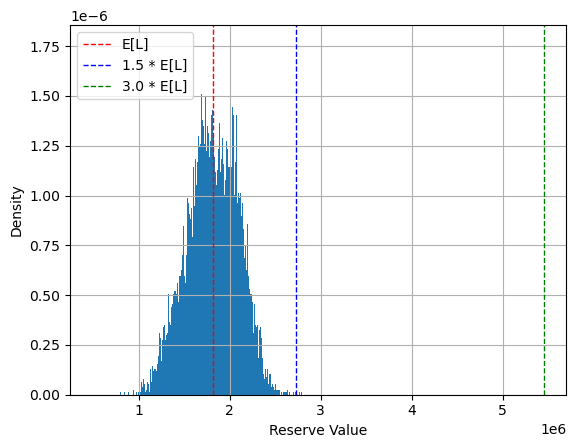

In [227]:
bin_vals, bin_edges = np.histogram(large_arr, bins=32000, density=True)
plt.hist(large_arr, bins=32000, range=(large_arr.min(), large_arr.max()), density=True)
plt.xlabel("Reserve Value")
plt.ylabel("Density")
plt.axvline(x=Exp_Loss, color='r', linestyle='dashed', linewidth=1, label='E[L]')
plt.axvline(x=1.5 * Exp_Loss, color='b', linestyle='dashed', linewidth=1, label='1.5 * E[L]')
plt.axvline(x=3.0 * Exp_Loss, color='g', linestyle='dashed', linewidth=1, label='3.0 * E[L]')
plt.grid(True)
plt.legend()
plt.show()

In [225]:
# np.diff(bin_edges)

Now let us compute the stop loss premium 
$$ \Pi(\beta) = \mathbb{E}[(S- \beta)_+] =  \int_{\beta}^{\infty} (1-F(x)) \, dx$$

In [228]:
betas = np.array([1.5* Exp_Loss, 3.0 * Exp_Loss])
premiums = []

survival_probs = 1.0 - bin_vals


for beta in betas:
    idx = np.searchsorted(bin_edges, beta, side='left')
    curr = np.sum(survival_probs[idx:] * np.diff(bin_edges)[idx:])  # Approximate integral using the histogram bins
    premiums.append(curr)

print("Premiums for beta values:", premiums)


Premiums for beta values: [np.float64(233722.33019379104), np.float64(0.0)]


In [222]:
print(bin_edges[2897:2899], bin_edges[3201:3204])

[2725247.42066332 2726017.00357522] []
